In [1]:
# Seed for random events
from numpy.random import seed
seed(1)

In [2]:
# Dependencies
import numpy as np
import pandas as pd

In [3]:
import tensorflow

C:\Users\luisg\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\luisg\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\luisg\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\luisg\anaconda3\envs\PythonData\lib\site-packages

In [4]:
bean_df = pd.read_csv('Resources/Dry_Bean_Dataset.csv')
bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


## Data Pre-Processing

In [5]:
X = bean_df.drop("Class", axis = 1)
y = bean_df['Class']
print(X.shape, y.shape)

(13611, 16) (13611,)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

In [8]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [10]:
# One-hot-encode the encoded labels
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

## Create Neural Network Model - Adam Optimizer

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
# Create model and add layers
adam = Sequential()
adam.add(Dense(units = 14, activation = 'relu', input_dim = 16))
adam.add(Dense(units = 7, activation = 'softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
# Compile and fit the model
adam.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
adam.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 14)                238       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 105       
Total params: 343
Trainable params: 343
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = adam.fit(
    X_train_scaled,
    y_train_categorical,
    epochs = 50,
    shuffle = True,
    verbose = 2
)

Epoch 1/50
10208/10208 - 0s - loss: 1.6566 - acc: 0.3144
Epoch 2/50
10208/10208 - 0s - loss: 1.0986 - acc: 0.6631
Epoch 3/50
10208/10208 - 0s - loss: 0.7514 - acc: 0.8234
Epoch 4/50
10208/10208 - 0s - loss: 0.5772 - acc: 0.8624
Epoch 5/50
10208/10208 - 0s - loss: 0.4833 - acc: 0.8717
Epoch 6/50
10208/10208 - 0s - loss: 0.4275 - acc: 0.8753
Epoch 7/50
10208/10208 - 0s - loss: 0.3923 - acc: 0.8774
Epoch 8/50
10208/10208 - 0s - loss: 0.3687 - acc: 0.8805
Epoch 9/50
10208/10208 - 0s - loss: 0.3520 - acc: 0.8818
Epoch 10/50
10208/10208 - 0s - loss: 0.3398 - acc: 0.8822
Epoch 11/50
10208/10208 - 0s - loss: 0.3303 - acc: 0.8851
Epoch 12/50
10208/10208 - 0s - loss: 0.3221 - acc: 0.8853
Epoch 13/50
10208/10208 - 0s - loss: 0.3169 - acc: 0.8872
Epoch 14/50
10208/10208 - 0s - loss: 0.3118 - acc: 0.8870
Epoch 15/50
10208/10208 - 0s - loss: 0.3070 - acc: 0.8887
Epoch 16/50
10208/10208 - 0s - loss: 0.3025 - acc: 0.8900
Epoch 17/50
10208/10208 - 0s - loss: 0.2987 - acc: 0.8921
Epoch 18/50
10208/10208

In [16]:
adam_losses = history.history['loss']
adam_accs = history.history['acc']

In [17]:
# Quantify Adam Model 
adam_loss, adam_acc = adam.evaluate(
    X_test_scaled, y_test_categorical, verbose = 2)
print(
    f"Neural Network with Adam Optimizer - Loss: {adam_loss}, Accuracy: {adam_acc}")

3403/3403 - 0s - loss: 0.2342 - acc: 0.9192
Neural Network with Adam Optimizer - Loss: 0.23419076983950748, Accuracy: 0.9191889762878418


## Nadam Optimizer

In [18]:
# Create model and add layers
nadam = Sequential()
nadam.add(Dense(units = 14, activation = 'relu', input_dim = 16))
nadam.add(Dense(units = 7, activation = 'softmax'))

In [19]:
# Compile and fit the model
nadam.compile(optimizer = 'nadam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [20]:
history = nadam.fit(
    X_train_scaled,
    y_train_categorical,
    epochs = 50,
    shuffle = True,
    verbose = 2
)

Epoch 1/50
10208/10208 - 0s - loss: 1.4994 - acc: 0.4062
Epoch 2/50
10208/10208 - 0s - loss: 0.9333 - acc: 0.7264
Epoch 3/50
10208/10208 - 0s - loss: 0.6503 - acc: 0.8484
Epoch 4/50
10208/10208 - 0s - loss: 0.5100 - acc: 0.8764
Epoch 5/50
10208/10208 - 0s - loss: 0.4326 - acc: 0.8840
Epoch 6/50
10208/10208 - 0s - loss: 0.3864 - acc: 0.8867
Epoch 7/50
10208/10208 - 0s - loss: 0.3569 - acc: 0.8873
Epoch 8/50
10208/10208 - 0s - loss: 0.3367 - acc: 0.8875
Epoch 9/50
10208/10208 - 0s - loss: 0.3218 - acc: 0.8905
Epoch 10/50
10208/10208 - 0s - loss: 0.3107 - acc: 0.8931
Epoch 11/50
10208/10208 - 0s - loss: 0.3017 - acc: 0.8923
Epoch 12/50
10208/10208 - 0s - loss: 0.2937 - acc: 0.8983
Epoch 13/50
10208/10208 - 0s - loss: 0.2880 - acc: 0.8982
Epoch 14/50
10208/10208 - 0s - loss: 0.2827 - acc: 0.8999
Epoch 15/50
10208/10208 - 0s - loss: 0.2778 - acc: 0.9020
Epoch 16/50
10208/10208 - 0s - loss: 0.2737 - acc: 0.9033
Epoch 17/50
10208/10208 - 0s - loss: 0.2702 - acc: 0.9035
Epoch 18/50
10208/10208

In [21]:
nadam_losses = history.history['loss']
nadam_accs = history.history['acc']

In [22]:
# Quantify Nadam Model 
nadam_loss, nadam_acc = nadam.evaluate(
    X_test_scaled, y_test_categorical, verbose = 2)
print(
    f"Neural Network with Nadam Optimizer - Loss: {nadam_loss}, Accuracy: {nadam_acc}")

3403/3403 - 0s - loss: 0.2272 - acc: 0.9174
Neural Network with Nadam Optimizer - Loss: 0.22722747726976222, Accuracy: 0.917425811290741


## RMSProp Optimizer

In [23]:
# Create model and add layers
rmsprop = Sequential()
rmsprop.add(Dense(units = 14, activation = 'relu', input_dim = 16))
rmsprop.add(Dense(units = 7, activation = 'softmax'))

In [24]:
# Compile and fit the model
rmsprop.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [25]:
history = rmsprop.fit(
    X_train_scaled,
    y_train_categorical,
    epochs = 50,
    shuffle = True,
    verbose = 2
)

Epoch 1/50
10208/10208 - 0s - loss: 1.8842 - acc: 0.3557
Epoch 2/50
10208/10208 - 0s - loss: 1.6731 - acc: 0.5445
Epoch 3/50
10208/10208 - 0s - loss: 1.4374 - acc: 0.5783
Epoch 4/50
10208/10208 - 0s - loss: 1.2339 - acc: 0.6629
Epoch 5/50
10208/10208 - 0s - loss: 1.0754 - acc: 0.6973
Epoch 6/50
10208/10208 - 0s - loss: 0.9399 - acc: 0.7334
Epoch 7/50
10208/10208 - 0s - loss: 0.8098 - acc: 0.8157
Epoch 8/50
10208/10208 - 0s - loss: 0.6944 - acc: 0.8662
Epoch 9/50
10208/10208 - 0s - loss: 0.5990 - acc: 0.8796
Epoch 10/50
10208/10208 - 0s - loss: 0.5262 - acc: 0.8833
Epoch 11/50
10208/10208 - 0s - loss: 0.4724 - acc: 0.8860
Epoch 12/50
10208/10208 - 0s - loss: 0.4335 - acc: 0.8883
Epoch 13/50
10208/10208 - 0s - loss: 0.4054 - acc: 0.8872
Epoch 14/50
10208/10208 - 0s - loss: 0.3830 - acc: 0.8894
Epoch 15/50
10208/10208 - 0s - loss: 0.3668 - acc: 0.8909
Epoch 16/50
10208/10208 - 0s - loss: 0.3525 - acc: 0.8922
Epoch 17/50
10208/10208 - 0s - loss: 0.3412 - acc: 0.8918
Epoch 18/50
10208/10208

In [26]:
rmsprop_losses = history.history['loss']
rmsprop_accs = history.history['acc']

In [27]:
# Quantify RMSProp Model 
rmsprop_loss, rmsprop_acc = rmsprop.evaluate(
    X_test_scaled, y_test_categorical, verbose = 2)
print(
    f"Neural Network with RMSProp Optimizer - Loss: {rmsprop_loss}, Accuracy: {rmsprop_acc}") 

3403/3403 - 0s - loss: 0.2521 - acc: 0.9080
Neural Network with RMSProp Optimizer - Loss: 0.252093127780615, Accuracy: 0.9080223441123962


## SGD Optimizer

In [28]:
# Create model and add layers
sgd = Sequential()
sgd.add(Dense(units = 14, activation = 'relu', input_dim = 16))
sgd.add(Dense(units = 7, activation = 'softmax'))

In [29]:
# Compile and fit the model
sgd.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [30]:
history = sgd.fit(
    X_train_scaled,
    y_train_categorical,
    epochs = 50,
    shuffle = True,
    verbose = 2
)

Epoch 1/50
10208/10208 - 0s - loss: 1.8376 - acc: 0.2353
Epoch 2/50
10208/10208 - 0s - loss: 1.6984 - acc: 0.2640
Epoch 3/50
10208/10208 - 0s - loss: 1.5694 - acc: 0.3491
Epoch 4/50
10208/10208 - 0s - loss: 1.4160 - acc: 0.4390
Epoch 5/50
10208/10208 - 0s - loss: 1.2592 - acc: 0.4964
Epoch 6/50
10208/10208 - 0s - loss: 1.1153 - acc: 0.5914
Epoch 7/50
10208/10208 - 0s - loss: 0.9889 - acc: 0.6902
Epoch 8/50
10208/10208 - 0s - loss: 0.8824 - acc: 0.7498
Epoch 9/50
10208/10208 - 0s - loss: 0.7949 - acc: 0.8051
Epoch 10/50
10208/10208 - 0s - loss: 0.7237 - acc: 0.8396
Epoch 11/50
10208/10208 - 0s - loss: 0.6650 - acc: 0.8567
Epoch 12/50
10208/10208 - 0s - loss: 0.6167 - acc: 0.8626
Epoch 13/50
10208/10208 - 0s - loss: 0.5764 - acc: 0.8695
Epoch 14/50
10208/10208 - 0s - loss: 0.5429 - acc: 0.8742
Epoch 15/50
10208/10208 - 0s - loss: 0.5144 - acc: 0.8773
Epoch 16/50
10208/10208 - 0s - loss: 0.4898 - acc: 0.8789
Epoch 17/50
10208/10208 - 0s - loss: 0.4688 - acc: 0.8827
Epoch 18/50
10208/10208

In [31]:
sgd_losses = history.history['loss']
sgd_accs = history.history['acc']

In [32]:
# Quantify SGD Model 
sgd_loss, sgd_acc = sgd.evaluate(
    X_test_scaled, y_test_categorical, verbose = 2)
print(
    f"Neural Network with SGD Optimizer - Loss: {sgd_loss}, Accuracy: {sgd_acc}")

3403/3403 - 0s - loss: 0.2927 - acc: 0.9019
Neural Network with SGD Optimizer - Loss: 0.2927121544301142, Accuracy: 0.9018512964248657


## Tabulate model accuracies and losses and graph performance

In [33]:
# Tabulate
optimizer_names = ["Adam", "Nadam", "RMSProp", "SGD"]
optimizer_accs = [adam_acc, nadam_acc, rmsprop_acc, sgd_acc]
optimizer_losses = [adam_loss, nadam_loss, rmsprop_loss, sgd_loss]
performance_df = pd.DataFrame({"Optimizer": optimizer_names,
                               "Accuracy": optimizer_accs,
                               "Loss": optimizer_losses})


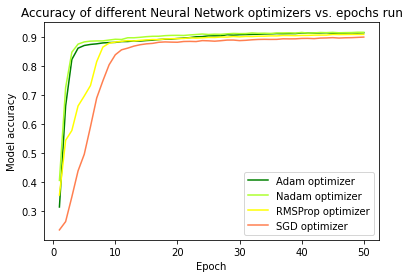

In [34]:
## Plot model accuracy and loss over epochs

import matplotlib.pyplot as plt

epochs = range(1,51)
plt.plot(epochs, adam_accs, 'green', label = "Adam optimizer")
plt.plot(epochs, nadam_accs, 'greenyellow', label = "Nadam optimizer")
plt.plot(epochs, rmsprop_accs, 'yellow', label = "RMSProp optimizer")
plt.plot(epochs, sgd_accs, 'coral', label = "SGD optimizer")
plt.xlabel("Epoch")
plt.ylabel("Model accuracy")
plt.title("Accuracy of different Neural Network optimizers vs. epochs run")
plt.legend()
plt.savefig("optimizer_accuracy.png")
plt.show()

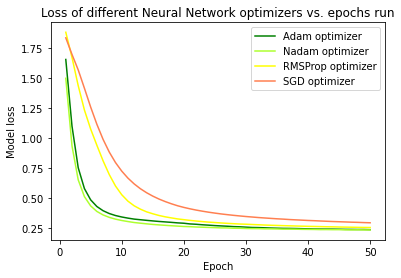

In [35]:
plt.plot(epochs, adam_losses, 'green', label = "Adam optimizer")
plt.plot(epochs, nadam_losses, 'greenyellow', label = "Nadam optimizer")
plt.plot(epochs, rmsprop_losses, 'yellow', label = "RMSProp optimizer")
plt.plot(epochs, sgd_losses, 'coral', label = "SGD optimizer")
plt.xlabel("Epoch")
plt.ylabel("Model loss")
plt.title("Loss of different Neural Network optimizers vs. epochs run")
plt.legend()
plt.savefig("optimizer_loss.png")
plt.show()

In [36]:
performance_df.set_index("Optimizer", inplace = True)

In [37]:
performance_df.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Accuracy</th>\n      <th>Loss</th>\n    </tr>\n    <tr>\n      <th>Optimizer</th>\n      <th></th>\n      <th></th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>Adam</th>\n      <td>0.919189</td>\n      <td>0.234191</td>\n    </tr>\n    <tr>\n      <th>Nadam</th>\n      <td>0.917426</td>\n      <td>0.227227</td>\n    </tr>\n    <tr>\n      <th>RMSProp</th>\n      <td>0.908022</td>\n      <td>0.252093</td>\n    </tr>\n    <tr>\n      <th>SGD</th>\n      <td>0.901851</td>\n      <td>0.292712</td>\n    </tr>\n  </tbody>\n</table>'